In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")


### Data Loading

In [2]:
## New Orleans dataset

data = pd.read_csv(r"D:\SHIVANGI\Interns\Labmentrix Internship\Airbnb\New Orleans\listings.csv")
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,19091,Fully Furnished Cozy Apartment,72880,John,NaN,Leonidas,29.96100,-90.11950,Entire home/apt,61.0,30,503,2023-11-06,2.78,1,329,0,"22-RSTR-14107, 22-OSTR-14105"
1,71624,Ravenwood Manor (Historic Bywater),367223,Susan,NaN,Bywater,29.96153,-90.04364,Entire home/apt,167.0,30,313,2025-02-02,1.83,1,342,15,"21-RSTR-18609, 22-OSTR-20720"
2,74498,Maison Marais 1,391462,Georgia,NaN,St. Roch,29.96986,-90.05172,Entire home/apt,150.0,3,649,2025-02-23,3.82,3,208,35,23-XSTR-13082
3,79536,FeelAtHomeInNewOrleans-PrivateApt,428362,Miriam,NaN,Seventh Ward,29.97803,-90.07450,Entire home/apt,179.0,3,768,2025-03-01,4.56,1,0,59,"23-NSTR-15067, 24-OSTR-20882"
4,79609,Bywater's Original & Finest,428909,Stephen,NaN,St. Claude,29.96448,-90.03667,Entire home/apt,136.0,30,505,2024-11-14,2.97,1,341,13,"23-ISTR-02823, 23-OSTR-02823"


### Data Understanding

In [3]:
data.shape  ## (Columns , rows)

(7842, 18)

In [4]:
data.info() ## Information about data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7842 entries, 0 to 7841
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              7842 non-null   int64  
 1   name                            7842 non-null   object 
 2   host_id                         7842 non-null   int64  
 3   host_name                       7829 non-null   object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   7842 non-null   object 
 6   latitude                        7842 non-null   float64
 7   longitude                       7842 non-null   float64
 8   room_type                       7842 non-null   object 
 9   price                           6640 non-null   float64
 10  minimum_nights                  7842 non-null   int64  
 11  number_of_reviews               7842 non-null   int64  
 12  last_review                     65

In [5]:
data.isnull().sum()  ## NULL values in dataset

id                                   0
name                                 0
host_id                              0
host_name                           13
neighbourhood_group               7842
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                             1202
minimum_nights                       0
number_of_reviews                    0
last_review                       1328
reviews_per_month                 1328
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
license                           1349
dtype: int64

### Data  Cleaning

In [6]:
data.columns.str.strip()  ## Removed leading and trailing values from column names

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license'],
      dtype='object')

In [7]:
## Drop Columns
data = data.drop(['neighbourhood_group','reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license'], axis=1)

## Removed Duplicates
data.drop_duplicates(inplace =True)

## Changed datatype of "last_review" from object to datetime
data['last_review'] = pd.to_datetime(data['last_review'], errors='coerce')

## Filling NULL values of "price" column with average prices of their respective neighbourhood
data['price'] = data['price'].fillna(
    data.groupby('neighbourhood')['price'].transform('mean')
)
## Summary
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7842 entries, 0 to 7841
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 7842 non-null   int64         
 1   name               7842 non-null   object        
 2   host_id            7842 non-null   int64         
 3   host_name          7829 non-null   object        
 4   neighbourhood      7842 non-null   object        
 5   latitude           7842 non-null   float64       
 6   longitude          7842 non-null   float64       
 7   room_type          7842 non-null   object        
 8   price              7841 non-null   float64       
 9   minimum_nights     7842 non-null   int64         
 10  number_of_reviews  7842 non-null   int64         
 11  last_review        6514 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(4), object(4)
memory usage: 735.3+ KB


### Data Transformation

In [8]:
## Creating a column "year"
data['year'] = data['last_review'].dt.year

## Creating a column "month"
data['month'] = data['last_review'].dt.month_name()


## According to the City of Chicago, you only need to register with the city if you host guests for fewer than 32 days at a time.
## This applies to most Airbnb operators in the city.
## Classify type of rental
def classify_property_type(nights):
    if nights < 32:
        return 'Short-Term Rental'
    else:
        return 'Long-Term Rental'

data['property_type'] = data['minimum_nights'].apply(classify_property_type)

data.head(3)

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,year,month,property_type
0,19091,Fully Furnished Cozy Apartment,72880,John,Leonidas,29.96100,-90.11950,Entire home/apt,61.0,30,503,2023-11-06,2023.0,November,Short-Term Rental
1,71624,Ravenwood Manor (Historic Bywater),367223,Susan,Bywater,29.96153,-90.04364,Entire home/apt,167.0,30,313,2025-02-02,2025.0,February,Short-Term Rental
2,74498,Maison Marais 1,391462,Georgia,St. Roch,29.96986,-90.05172,Entire home/apt,150.0,3,649,2025-02-23,2025.0,February,Short-Term Rental


### Problem areas to explore

## Which are the popular neighbourhoods, their average pricing, and no. of listings?

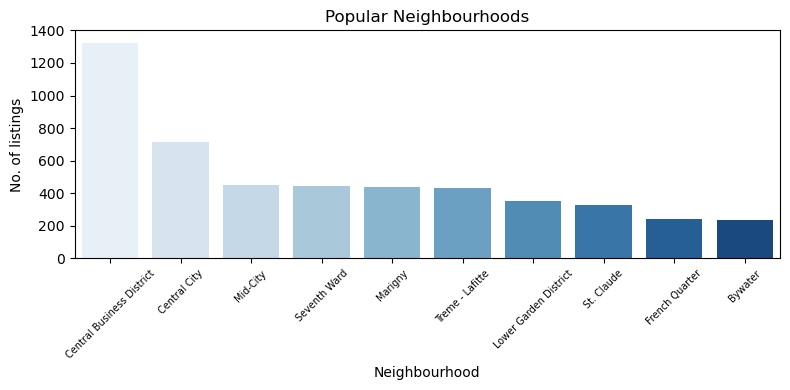

In [25]:
## -----------------------------------------------------Top 10 popular neighbourhoods--------------------------------------------------------------------
popular_neighbourhoods = data['neighbourhood'].value_counts().sort_values(ascending = False).reset_index(name = 'No. of listings').head(10)
popular_neighbourhoods.head(10)

## Plot 
plt.figure(figsize=(8,4))

## Barplot
sns.barplot(popular_neighbourhoods, x = 'neighbourhood', y='No. of listings', palette = "Blues")
plt.title("Popular Neighbourhoods")
plt.xlabel("Neighbourhood")
plt.ylabel("No. of listings")
plt.xticks(rotation = 45, fontsize =7)
plt.yticks(range(0,1500,200))

plt.tight_layout()
plt.show()

In [10]:
## ------------------------------popular neighbourhoods, their average pricing, and no. of listings------------------------------------------------------
popular_neighbourhoods_stats = data.groupby('neighbourhood').agg({'id':'count','price':'mean'}).sort_values(by = 'id', ascending = False).reset_index().head(10)
popular_neighbourhoods_stats.columns = ['neighbourhood', 'number_of_listings', 'average_price']
popular_neighbourhoods_stats

,neighbourhood,number_of_listings,average_price
0,Central Business District,1321,399.837209
1,Central City,716,372.499195
2,Mid-City,448,215.553191
3,Seventh Ward,445,898.917098
4,Marigny,438,418.124668
5,Treme - Lafitte,431,848.141689
6,Lower Garden District,355,335.093248
7,St. Claude,329,271.309963
8,French Quarter,241,411.679070
9,Bywater,238,281.866667


## What is the percent share of different property types and room types?

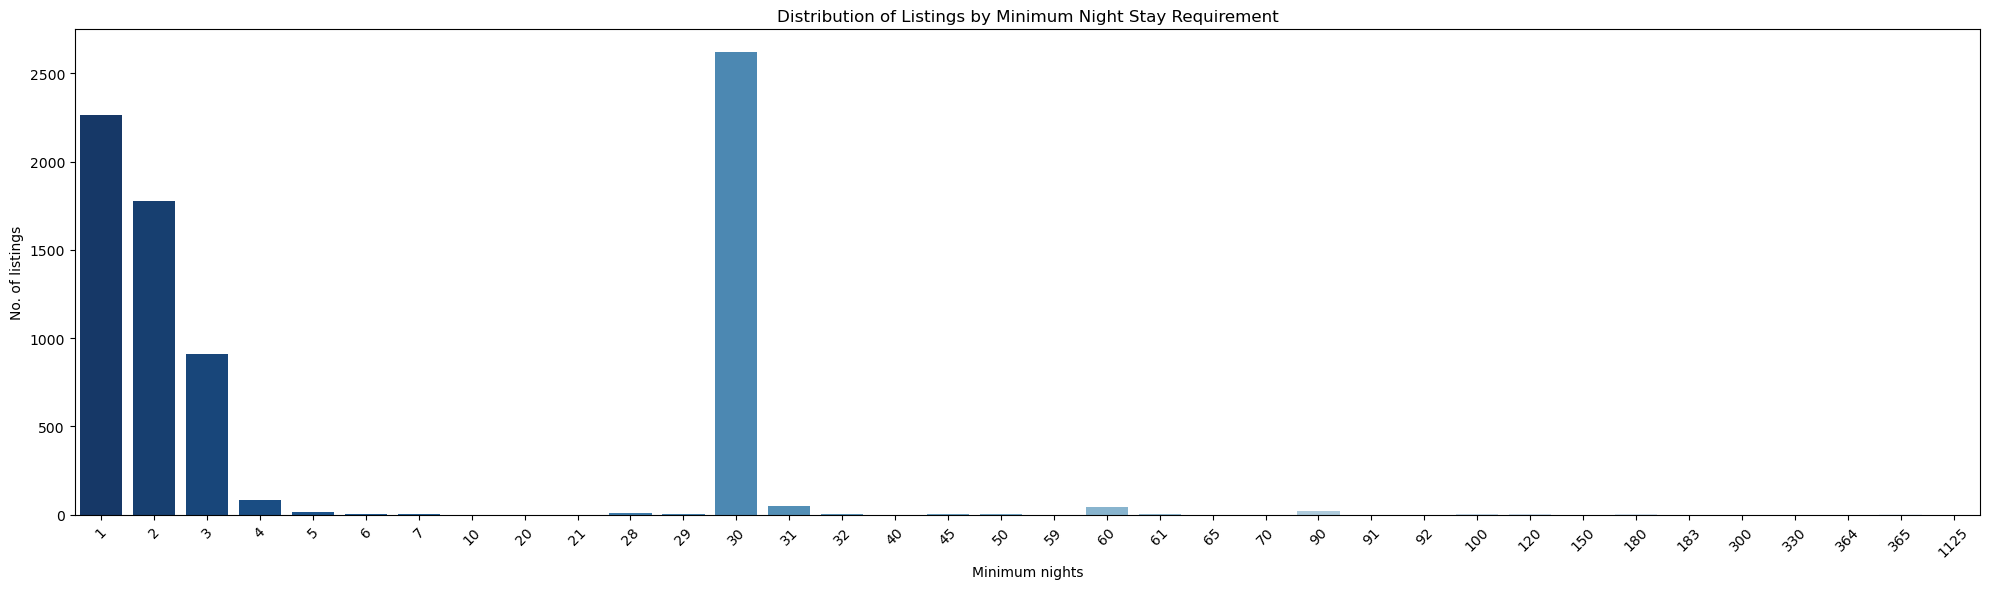

In [11]:
nights = data['minimum_nights'].value_counts().reset_index(name = 'Count').sort_values(by = 'minimum_nights')
nights

## Property type
plt.figure(figsize =(20,6))

sns.barplot(nights, x = 'minimum_nights', y = 'Count', palette = 'Blues_r')
plt.title("Distribution of Listings by Minimum Night Stay Requirement")
plt.ylabel("No. of listings")
plt.xlabel("Minimum nights")
plt.xticks(rotation = 45)

plt.tight_layout()
plt.show()

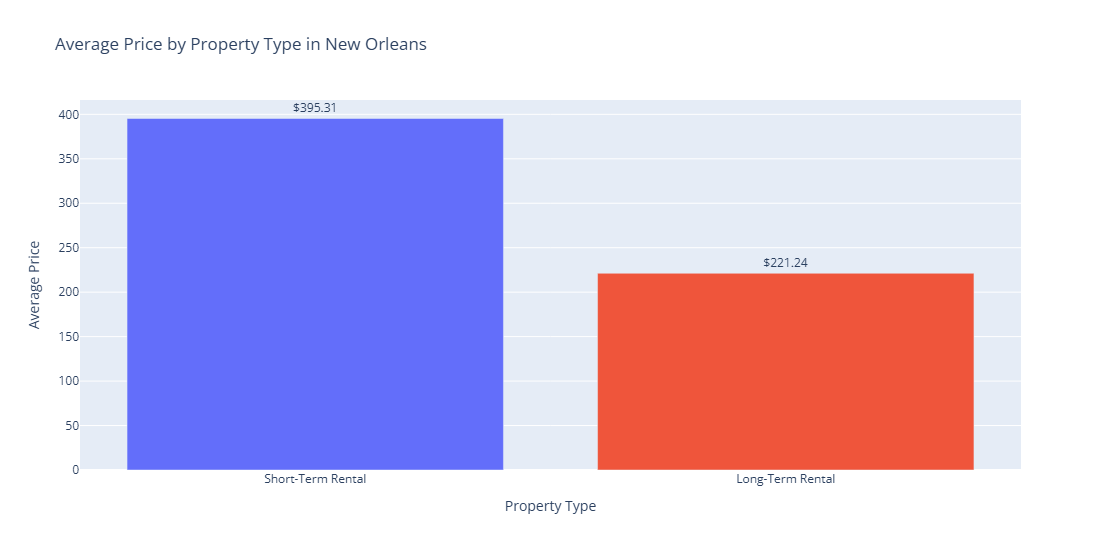

In [35]:
## --------------------------------------------------------Percent Share by property type---------------------------------------------------------------- 
avg_price_by_room = data.groupby('property_type')['price'].mean().sort_values(ascending=False)
fig = px.bar(avg_price_by_room.reset_index(),
             x='property_type',
             y='price',
             title='Average Price by Property Type in New Orleans',
             color='property_type',
             text='price')

fig.update_traces(texttemplate='$%{text:.2f}', textposition='outside')
fig.update_layout(height = 550, width = 550,showlegend=False, yaxis_title='Average Price', xaxis_title='Property Type')
fig.show()                                  

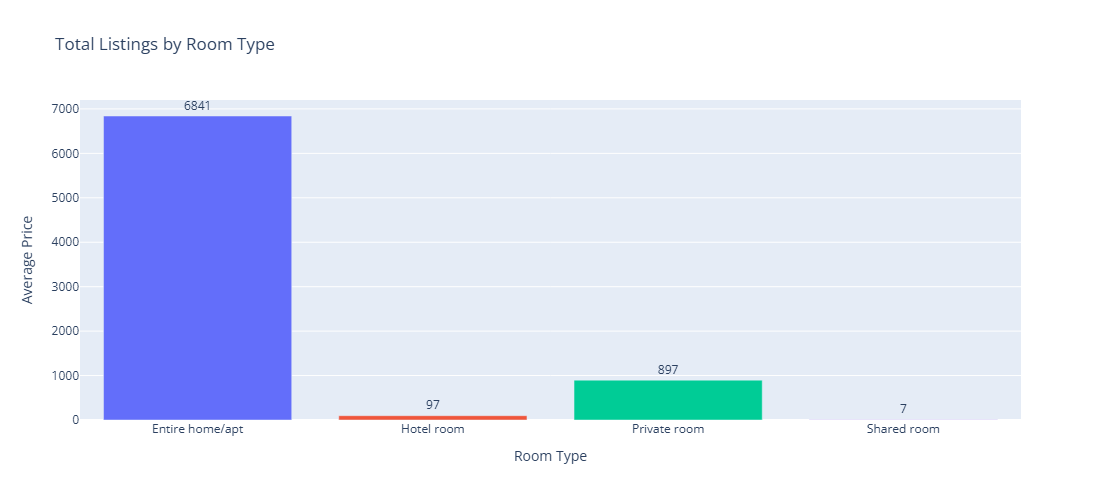

In [38]:
## --------------------------------------------------------------Number of Listings per room type------------------------------------------------------
listing_by_room = data.groupby('room_type')['id'].count().reset_index(name='Total Listings')
fig = px.bar(listing_by_room.reset_index(),
             x='room_type',
             y='Total Listings',
             title='Total Listings by Room Type',
             color='room_type',
             text='Total Listings')

fig.update_traces( textposition='outside')
fig.update_layout(height = 500, width = 600,showlegend=False, yaxis_title='Average Price', xaxis_title='Room Type')
fig.show()

- **Entire home/apartment** dominates the market, making up the majority of listings — often 60–70%.

- **Private rooms** are the second most common, catering to budget-conscious travelers or solo guests.

- **Shared rooms** make up a very small portion of the listings — often less than 5%, showing limited demand or availability.

- **Hotel rooms** are also a minor category and usually found in commercial neighborhoods.

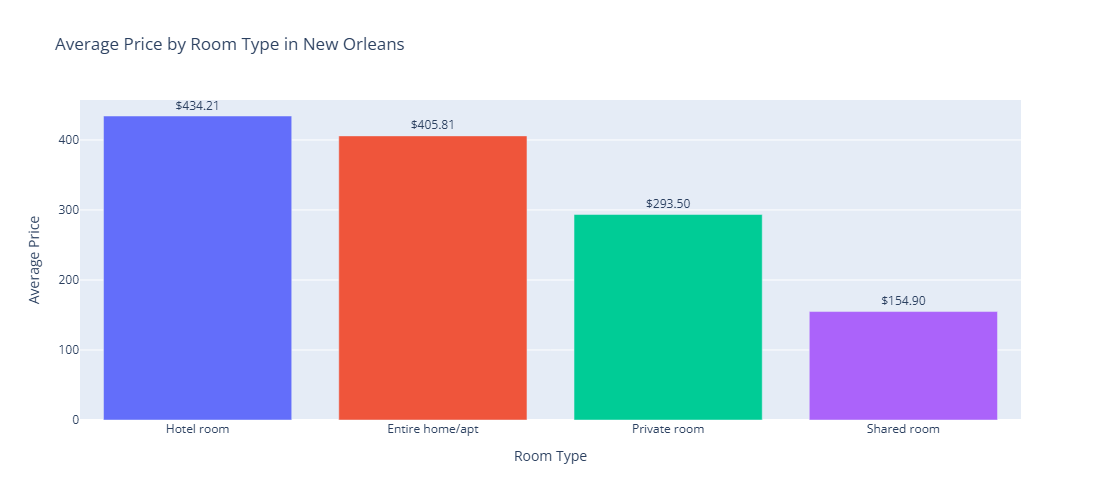

In [40]:
 ## ----------------------------------------------------------Percent Share by Room type----------------------------------------------------------------
avg_price_by_room = data.groupby('room_type')['price'].mean().sort_values(ascending=False)
fig = px.bar(avg_price_by_room.reset_index(),
             x='room_type',
             y='price',
             title='Average Price by Room Type in New Orleans',
             color='room_type',
             text='price')

fig.update_traces(texttemplate='$%{text:.2f}', textposition='outside')
fig.update_layout(height = 500, width = 600,showlegend=False, yaxis_title='Average Price', xaxis_title='Room Type')
fig.show()

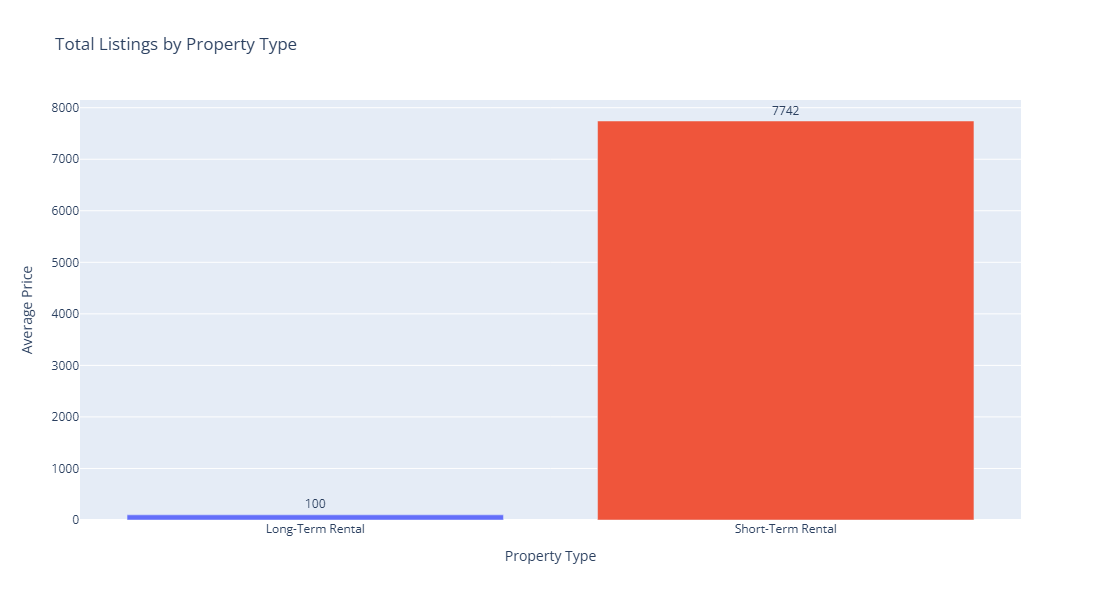

In [44]:
## --------------------------------------------------------------Number of Listings per property type------------------------------------------------------
listing_by_property= data.groupby('property_type')['id'].count().reset_index(name='Total Listings')
fig = px.bar(listing_by_property.reset_index(),
             x='property_type',
             y='Total Listings',
             title='Total Listings by Property Type',
             color='property_type',
             text='Total Listings')

fig.update_traces( textposition='outside')
fig.update_layout(height = 600, width = 500,showlegend=False, yaxis_title='Average Price', xaxis_title='Property Type')
fig.show()

- **Short-Term Rentals** are making up the majority of listings.

## How the pricing is varying with location, property type, reviews?

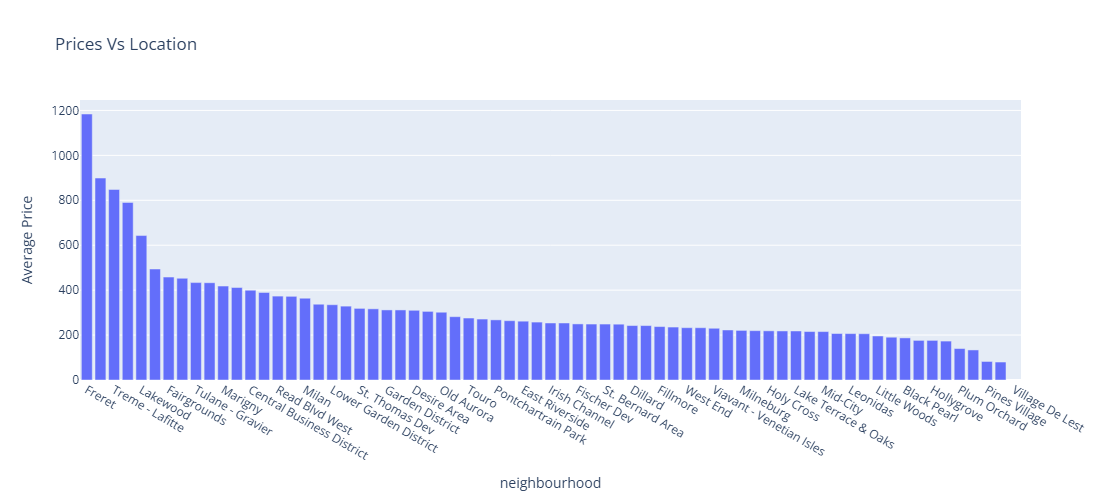

In [15]:
## ------------------------------------------------------Prices varying with location-------------------------------------------------------------------
price_varying_with_location = data.groupby('neighbourhood')['price'].mean().sort_values( ascending =False).reset_index(name = 'Average Price')

## Plot
fig = px.bar(price_varying_with_location, x='neighbourhood', y='Average Price', title = "Prices Vs Location")

# Update layout
fig.update_layout(
    height=500,
    width=1000,
    showlegend=False
)
fig.show()

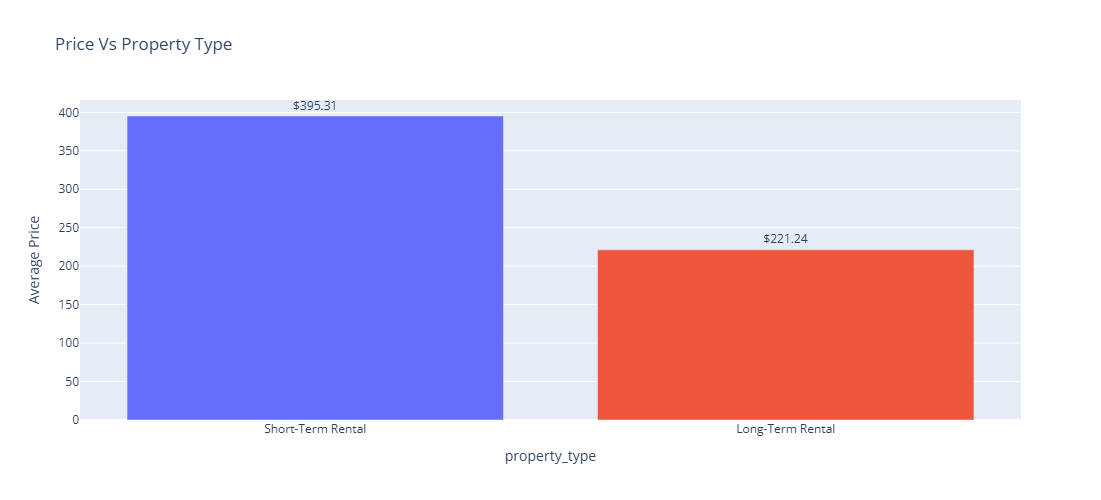

In [46]:

## ------------------------------------------------------prices Vs property type------------------------------------------------------------------------
prices_vs_property_type = data.groupby('property_type')['price'].mean().sort_values(ascending = False).reset_index(name = 'Average Price')

## Plot
fig2 = px.bar(prices_vs_property_type, x = 'property_type', y = 'Average Price',color = ['Blue', 'Red'],text = 'Average Price', title = "Price Vs Property Type")

# Update layout
fig2.update_traces(texttemplate='$%{text:.2f}', textposition='outside')
fig2.update_layout(
    height=500,
    width=500,
    showlegend=False
)

fig2.show()

- **Short-Term Rentals** are the expensive property type in New Orleans.

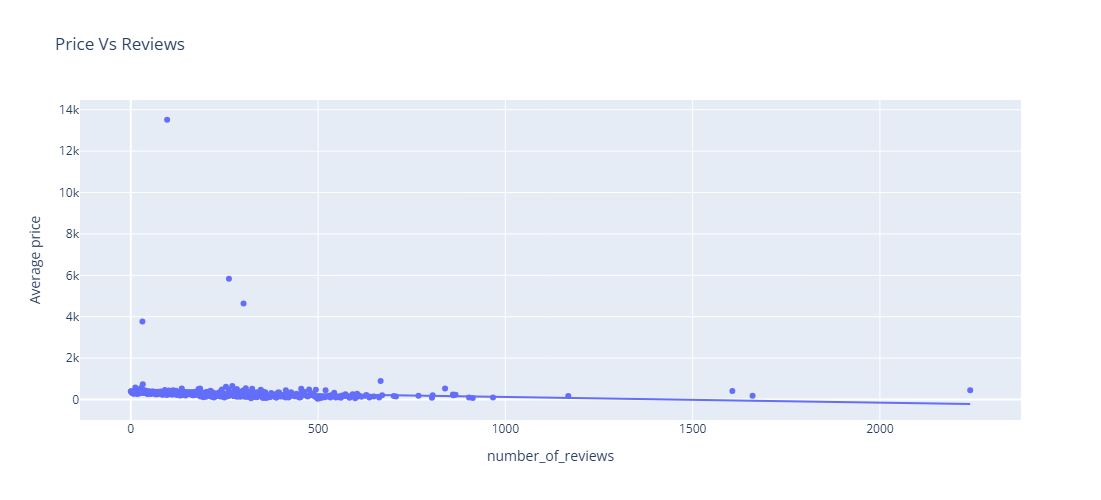

In [17]:
## -----------------------------------------------------prices vs Reviews-------------------------------------------------------------------------------
prices_vs_reviews = data.groupby('number_of_reviews')['price'].mean().reset_index(name = 'Average price')
fig3 = px.scatter(prices_vs_reviews, x = 'number_of_reviews', y = 'Average price', title = "Price Vs Reviews",trendline = "ols")

# Update layout
fig3.update_layout(
    height=500,
    width=500,
    showlegend=False
)

fig3.show()

-  The slight downward trendline indicates that as the **number of reviews increases, the average price tends to decrease.**

In [19]:
## Correlation Between Number of Reviews and Average Price
correlation = data.select_dtypes(exclude = 'object').corr()

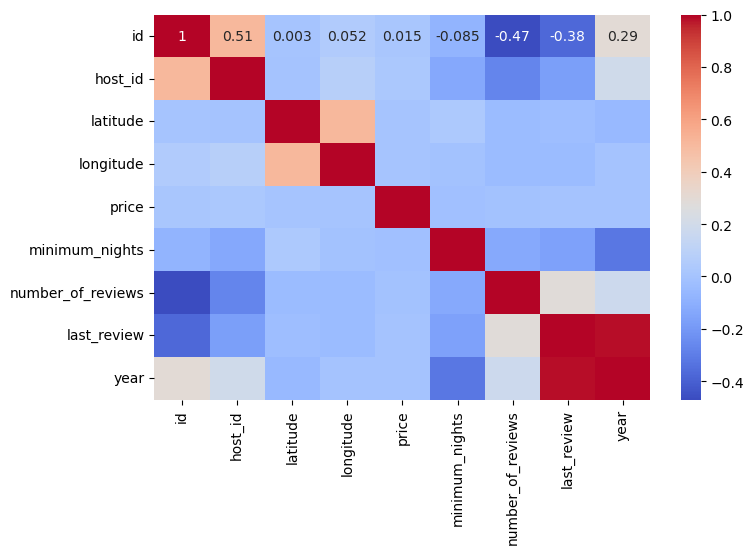

In [20]:
plt.figure(figsize = (8,5))
sns.heatmap(correlation, annot=True, cmap='coolwarm')

plt.show()

## What are the different correlations between types of host and factors like - reviews and price?

In [21]:
top_hosts = data.groupby('host_name').agg({'id':'count','number_of_reviews':'sum','price':'mean'}).rename(columns ={'id':'Total Listings','number_of_reviews':'Total Reviews','price':'Average Price'}).sort_values(by = 'Total Listings', ascending = False).head(50).reset_index()
top_hosts

,host_name,Total Listings,Total Reviews,Average Price
0,Tigran,329,4356,262.256788
1,RoomPicks,104,280,428.703497
2,David,99,7290,382.331787
3,Roami,93,8078,310.612965
4,Brenna And Nick,82,7141,218.522410
5,William,80,4991,238.271444
6,Marigny,80,5515,189.095745
7,Myra,78,371,566.820513
8,Evolve,77,823,249.244728
9,Mike,73,5527,302.892352


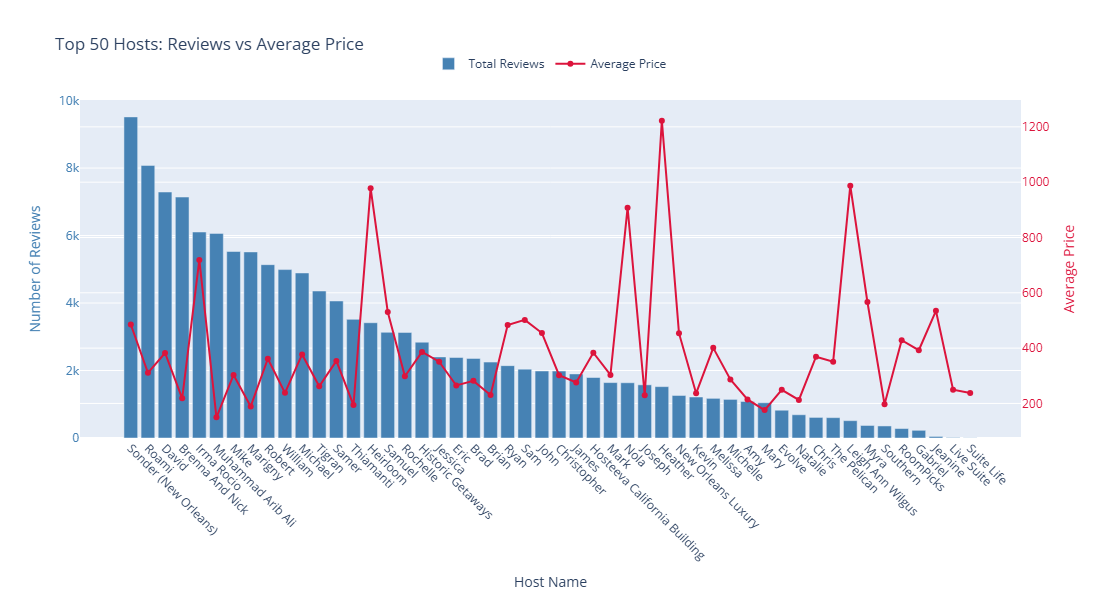

In [22]:
import plotly.graph_objects as go

# --- Initialize Figure ---
fig = go.Figure()

# --- Bar Plot: Number of Reviews (Y-Axis 1) ---
top_hosts_sorted = top_hosts.sort_values(by='Total Reviews', ascending=False)
fig.add_trace(go.Bar(
    x=top_hosts_sorted['host_name'],
    y=top_hosts_sorted['Total Reviews'],
    name='Total Reviews',
    marker_color='steelblue',
    yaxis='y'
))

# --- Line Plot: Average Price (Y-Axis 2) ---
fig.add_trace(go.Scatter(
    x=top_hosts_sorted['host_name'],
    y=top_hosts_sorted['Average Price'],
    name='Average Price',
    yaxis='y2',
    mode='lines+markers',
    line=dict(color='crimson')
))

# --- Layout Customization ---
fig.update_layout(
    title='Top 50 Hosts: Reviews vs Average Price',
    xaxis=dict(title='Host Name', tickangle=45),
    yaxis=dict(
        title='Number of Reviews',
        titlefont=dict(color='steelblue'),
        tickfont=dict(color='steelblue')
    ),
    yaxis2=dict(
        title='Average Price',
        titlefont=dict(color='crimson'),
        tickfont=dict(color='crimson'),
        overlaying='y',
        side='right'
    ),
    legend=dict(x=0.5, y=1.15, orientation='h', xanchor='center'),
    height=600,
    width=1200
)

# --- Show ---
fig.show()